# Clustering & Anomaly Detection

## _Apprendimento Automatico_ | LM in *Data Science*

##      

da Python Machine Learning - Code Examples | Ch. 11 e dalla documentazione di Scikit-learn

In [1]:
from IPython.display import Image
%matplotlib inline

# Raggruppare Oggetti per Similarità tramite *k-means*

## K-means in scikit-learn

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

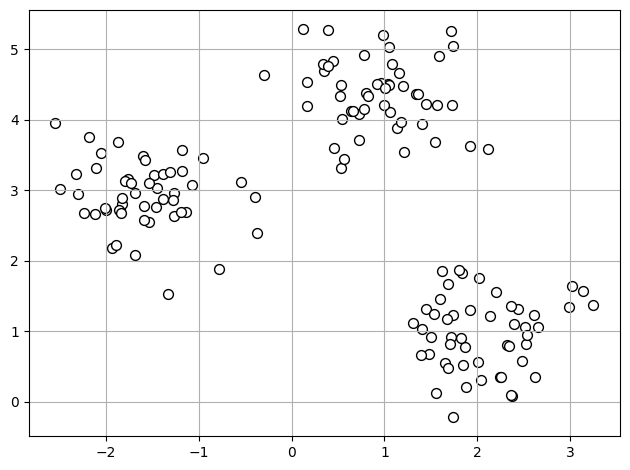

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

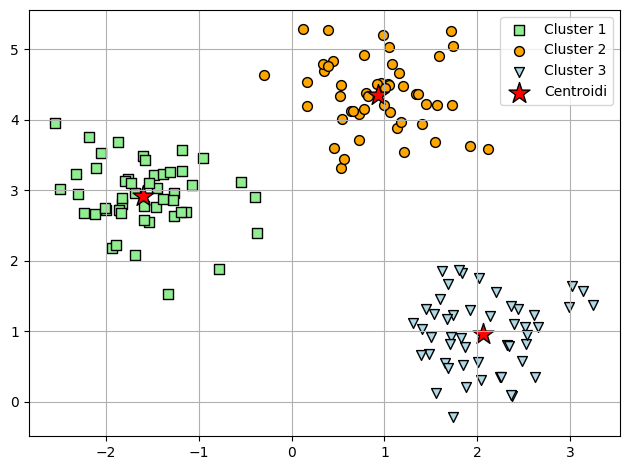

In [5]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, 
            c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, 
            c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, 
            c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', edgecolor='black',
            label='Centroidi')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

## Metodo del *gomito* per trovare il numero ottimale di cluster 

In [6]:
print('Distorsione (errore): %.2f' % km.inertia_)

Distorsione (errore): 72.48


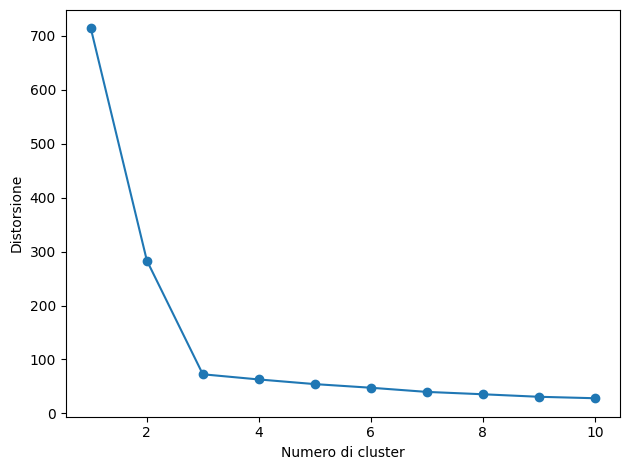

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Distorsione')
plt.tight_layout()

## Diagrammi della *Silhouette*
### per Quantificare la Qualità del Clustering  

Silhouette: $$s^i = \frac{b^i-a^i}{\max{(a^i,b^i)}}$$

+ $a^i$ coesione
+ $b^i$ separazione

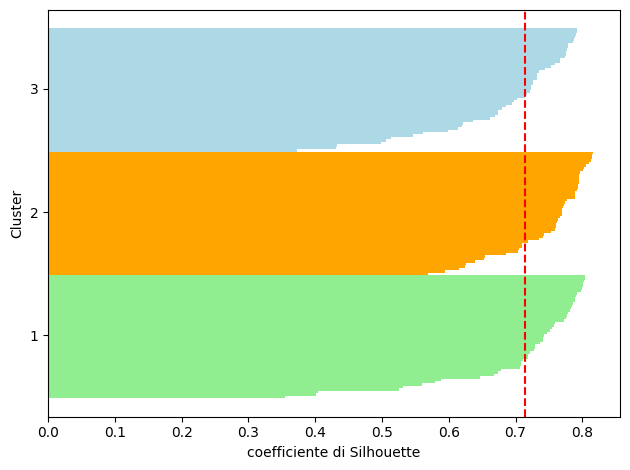

In [8]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04, 
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
colors = ['lightgreen', 'orange', 'lightblue']
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = colors[c] # cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('coefficiente di Silhouette')
plt.tight_layout()

Caso di "bad" clustering:

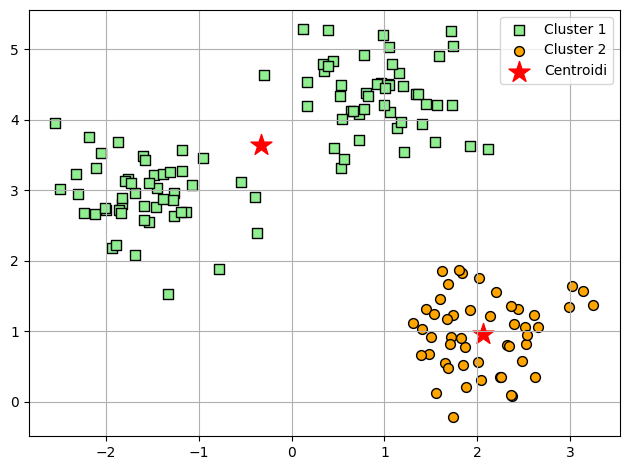

In [9]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen',edgecolor='black',
            marker='s',label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', 
            marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroidi')
plt.legend()
plt.grid()
plt.tight_layout()

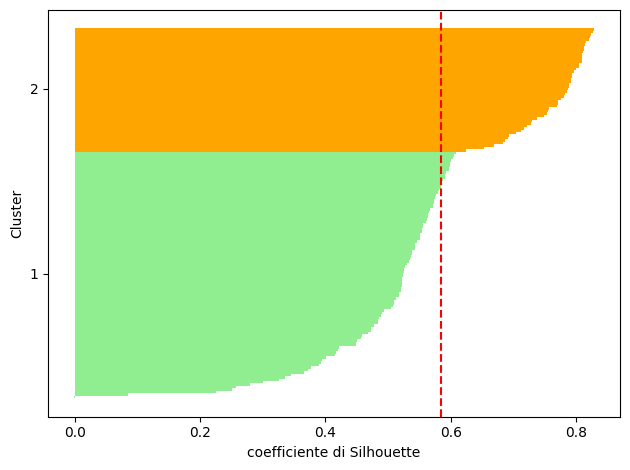

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
colors = ['lightgreen','orange']
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = colors[c] # cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, height=1.0, 
             edgecolor='none', 
             color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('coefficiente di Silhouette')
plt.tight_layout()

### Uso della Silhouette 

#### per calcolare il numero di cluster ottimale

Cfr. esempio nella doc. di [sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

## Clustering Spettrale

[`SpectralClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) calcola un embedding a bassa dimensionalità della matrice di affinità tra le istanze, seguito dal clustering, ad es. usando KMeans stesso, delle componenti degli autovettori nel nuovo spazio.

È possibile utilizzare diverse strategie di _assegnazione delle etichette_, attraverso il parametro `assign_labels`:
- `"kmeans"` può risultare migliore sui  dettagli, ma anche _instabile_: se non si controlla il random_state, un'esecuzione potrebbe non essere riproducibile (dipende dall'inizializzazione casuale) 
- strategia `"discretize"` riproducibile al 100%, ma tende a creare cluster di forma geometrica abbastanza uniforme 
- `"cluster_qr"` alternativa deterministica recente che tende a creare clustering visivamente migliori

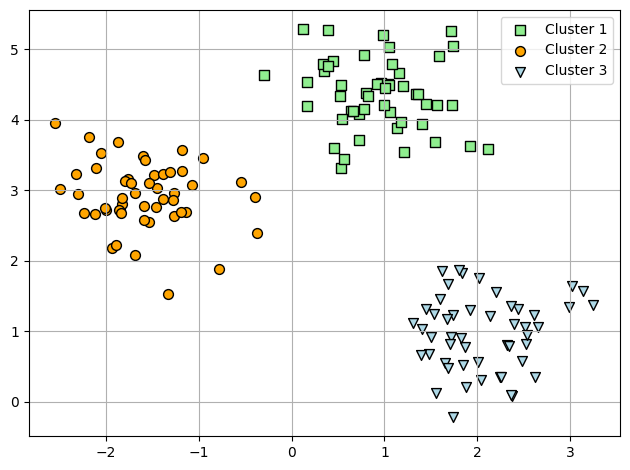

In [11]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, affinity='rbf', random_state=0)
y_sc = sc.fit_predict(X)

plt.scatter(X[y_sc == 0, 0], X[y_sc == 0, 1], s=50, c='lightgreen',edgecolor='black',
            marker='s',label='Cluster 1')
plt.scatter(X[y_sc == 1, 0], X[y_sc == 1, 1], s=50, c='orange', edgecolor='black', 
            marker='o', label='Cluster 2')
plt.scatter(X[y_sc == 2, 0], X[y_sc == 2, 1], s=50, c='lightblue', edgecolor='black', 
            marker='v', label='Cluster 3')
plt.legend()
plt.grid()
plt.tight_layout()

#### Esercizi
- Per un diverso dataset (artificiale o reale), calcolare i coeff. di Silhouette del clustering ottenuto con il metodo Spettrale

# Clustering Gerarchico

## Raggruppamento Bottom-up

Image(filename='./images/11_07.png', width=400) 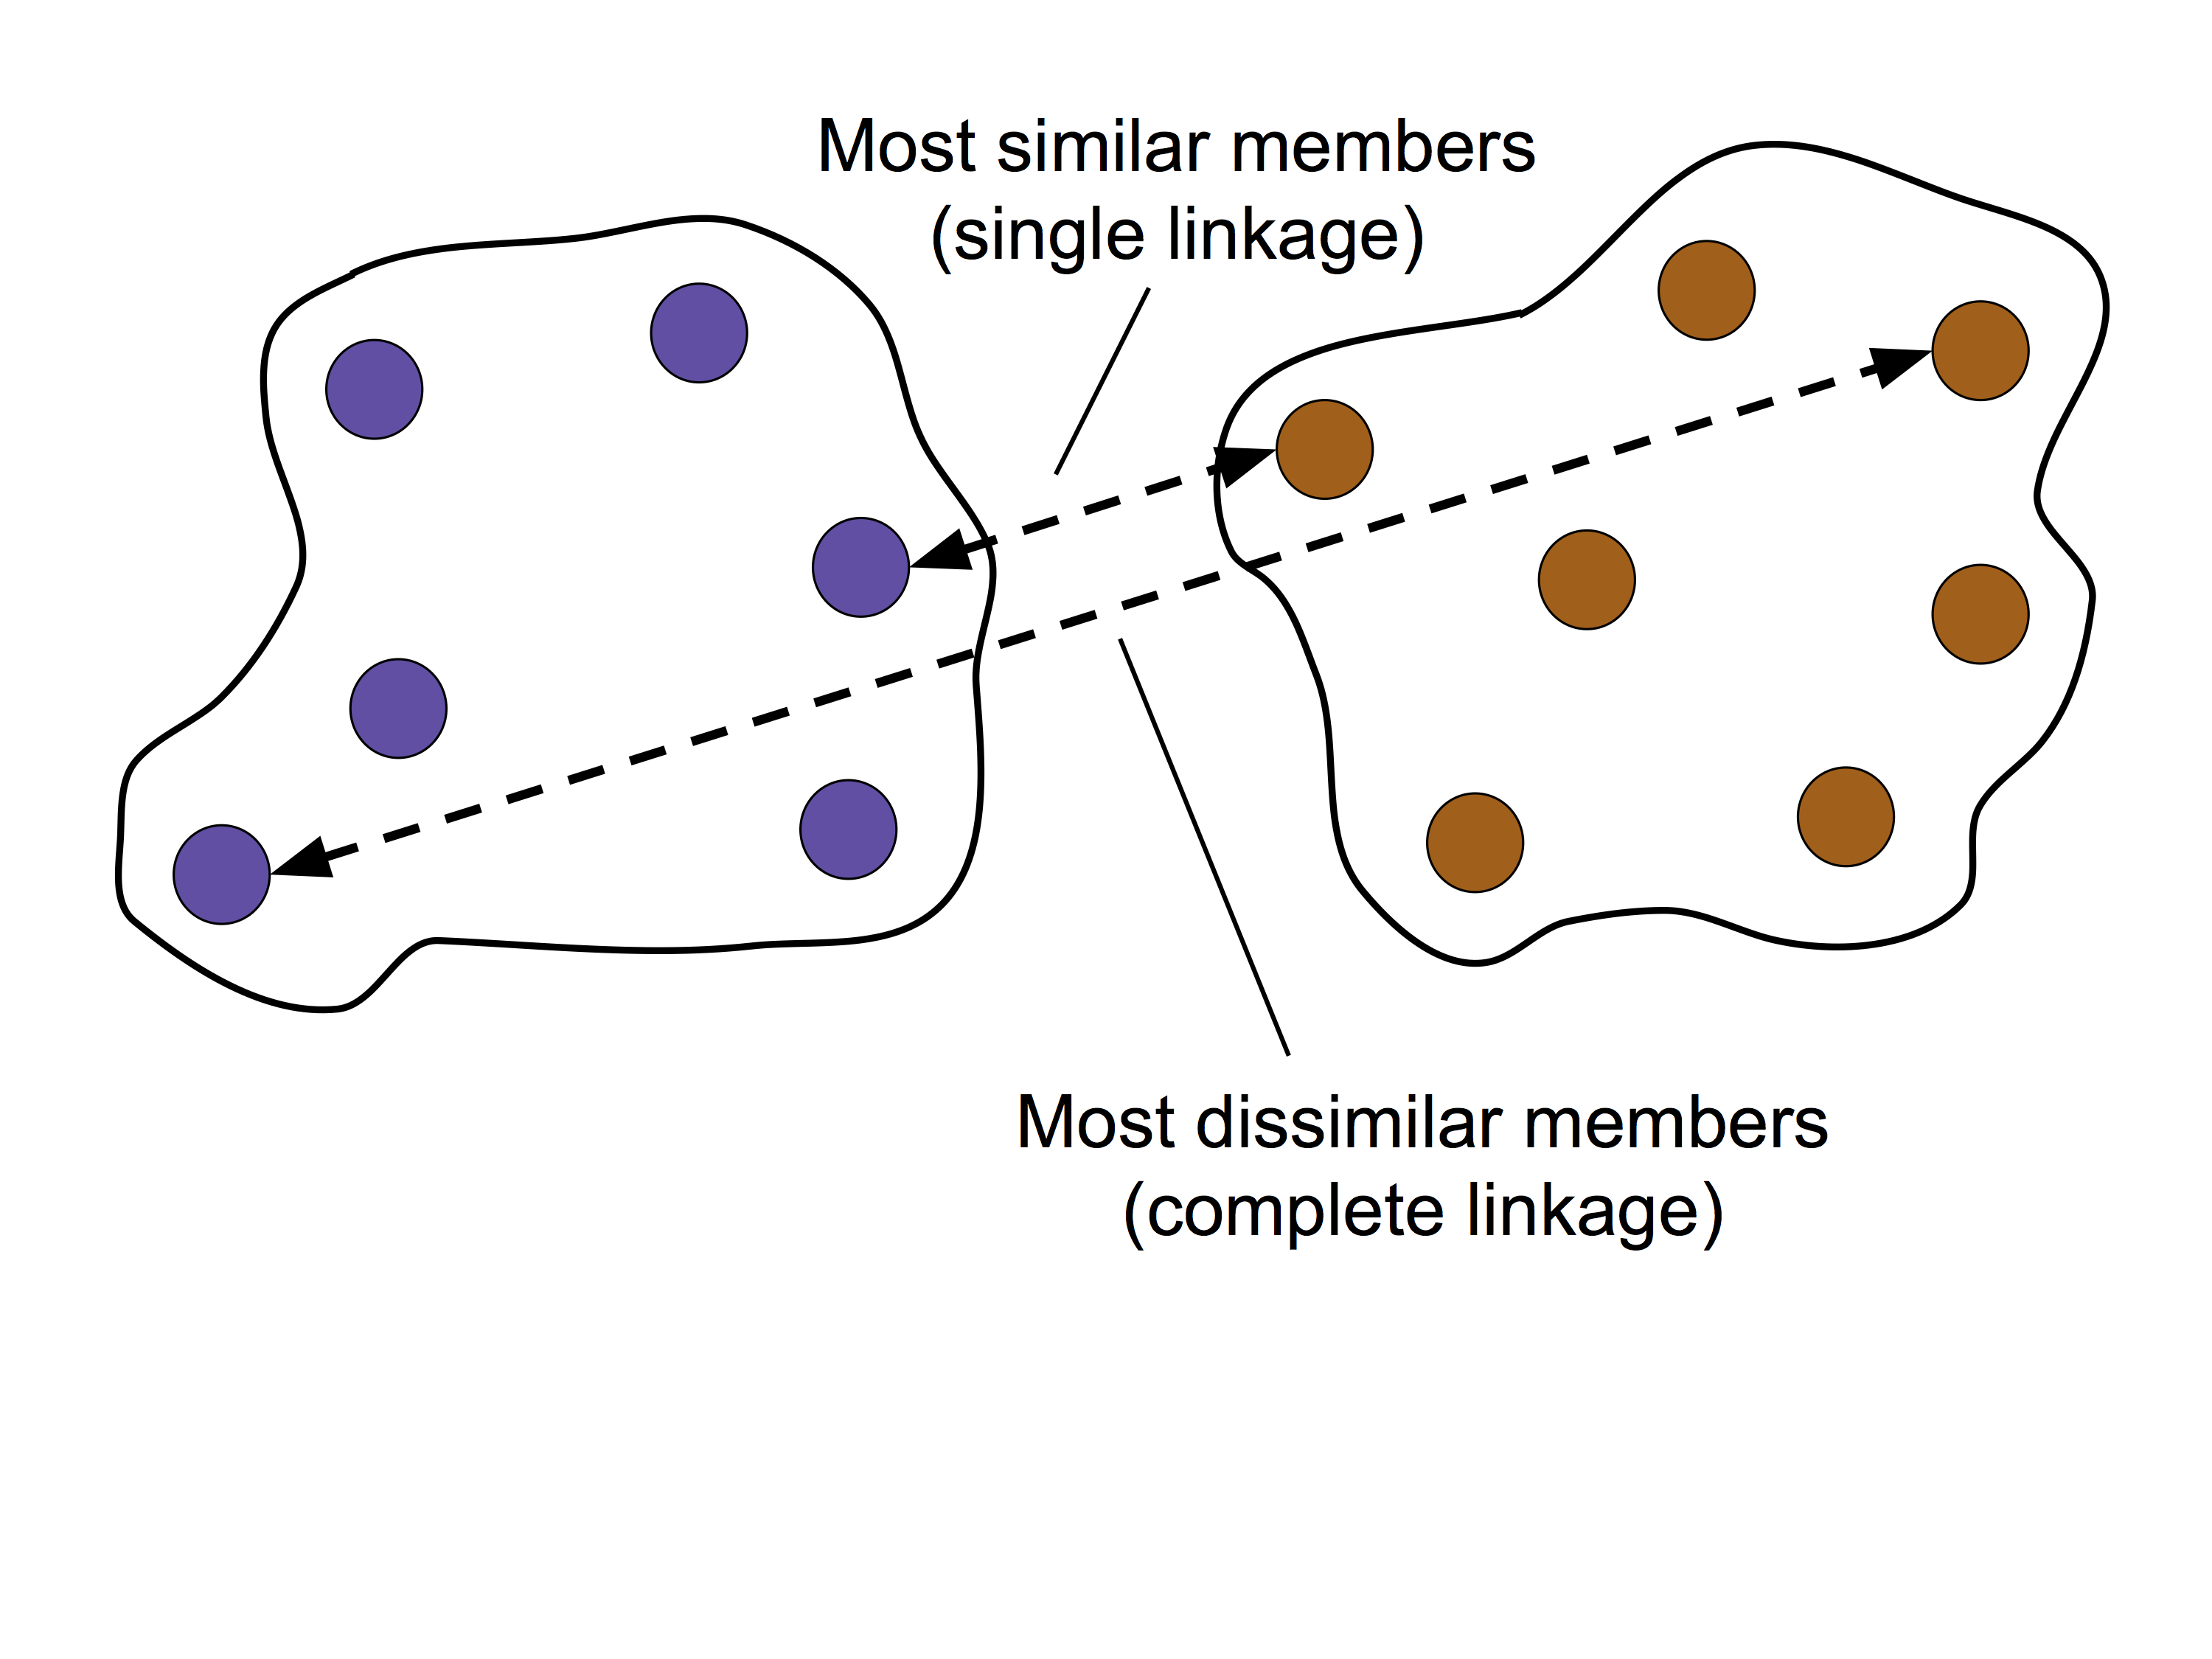

In [12]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Clustering Gerarchico su Matrice di Distanza

### Usando `linkage` di Scipy

cfr. [documentazione](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) Scipy

In [13]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Si può passare una matrice di distanza *condensata* (triangolare superiore) ottenuta con la funzione `pdist`, oppure la *matrice originale* dei dati e impostando in `linkage` l'argomento `metric='euclidean'` 

NON andrebbe passata, invece, la matrice di distanza _quadrata_, `squareform`, che potrebbe avere distanze diverse anche se il clustering finale potrebbe risultare analogo

In [14]:
# 1. approccio non corretto: matrice distanze non condensata

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['etichetta riga 1', 'etichetta riga 2',
                      'distanza', 'n. elementi nel clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/tmp/ipykernel_6559/3673521243.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,etichetta riga 1,etichetta riga 2,distanza,n. elementi nel clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [15]:
# 2. approccio corretto: matrice condensata

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['etichetta riga 1', 'etichetta riga 2',
                      'distanza', 'n. elementi nel clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,etichetta riga 1,etichetta riga 2,distanza,n. elementi nel clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [16]:
# 3. approccio corretto: matrice originale dei dati

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['etichetta riga 1', 'etichetta riga 2',
                      'distanza', 'n. elementi nel clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,etichetta riga 1,etichetta riga 2,distanza,n. elementi nel clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


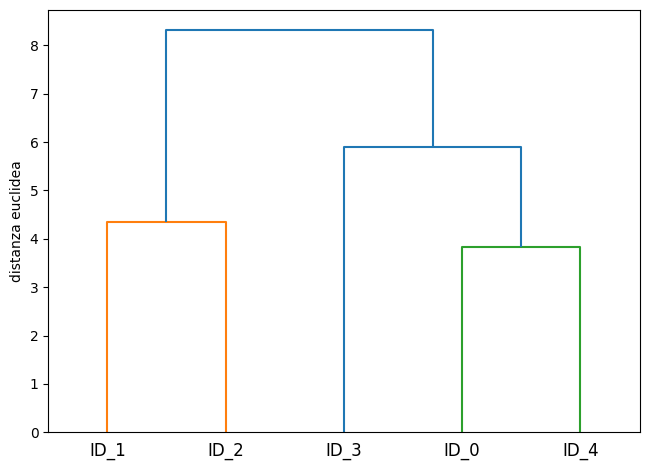

In [17]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('distanza euclidea')
plt.show()

## Dendrogrammi su Heat Map

/tmp/ipykernel_6559/3037356487.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_6559/3037356487.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


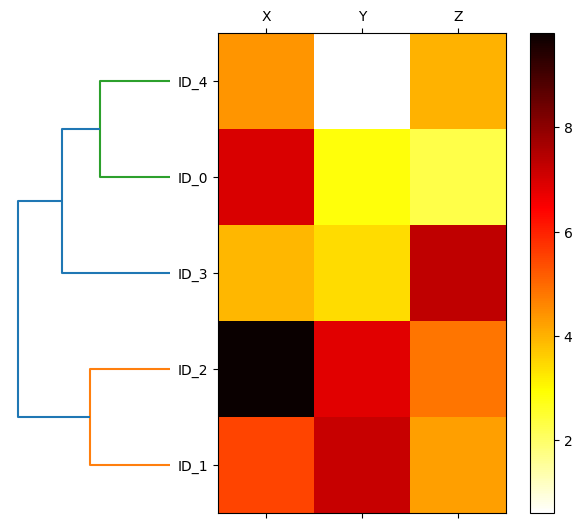

In [18]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
fig.colorbar(cax)
plt.show()

## Clustering Agglomerativo in scikit-learn

cfr. sez. [hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

In [19]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Etichette Cluster: %s' % labels)

Etichette Cluster: [1 0 0 2 1]


In [20]:
ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Etichette Cluster: %s' % labels)

Etichette Cluster: [0 1 1 0 0]


`AgglomerativeClustering` calcola un clustering gerarchico utilizzando un approccio bottom-up. 

Il __linkage__ determina la metrica utilizzata per la strategia di fusione:

- __Ward__ minimizza la somma delle differenze al quadrato all'interno di tutti i cluster, un approccio che minimizza la varianza (come la funzione obiettivo di k-means);
- __completo__: minimizza la distanza massima tra le osservazioni di coppie di cluster;
- __medio__: minimizza la media delle distanze tra tutte le osservazioni di coppie di cluster;
- __singolo__: minimizza la distanza tra le osservazioni più vicine delle coppie di cluster.


`AgglomerativeClustering` scala anche su un numero elevato di istanze se usato con una matrice di connettività, ma è computazionalmente _costoso_ quando non vengono aggiunti vincoli di connettività tra i campioni: considera a ogni passo tutte le possibili fusioni.

### Esempio: Clustering Agglomerativo su embedding bidimensionali di cifre scritte a mano

dalla [doc](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#) di sklearn

- embedding calcolato con `sklearn,manifold.SpectralEmbedding`

Calcolo dell'embedding..
fine.

ward :	0.12s
average :	0.11s
complete :	0.11s
single :	0.03s




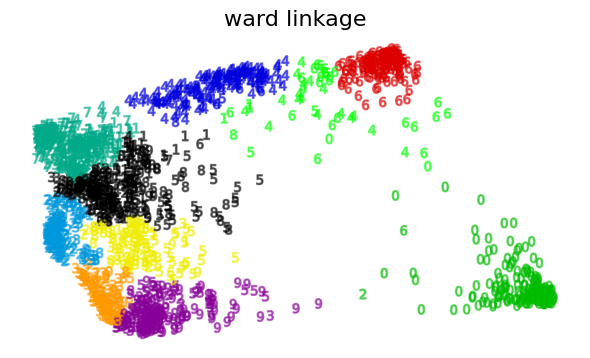

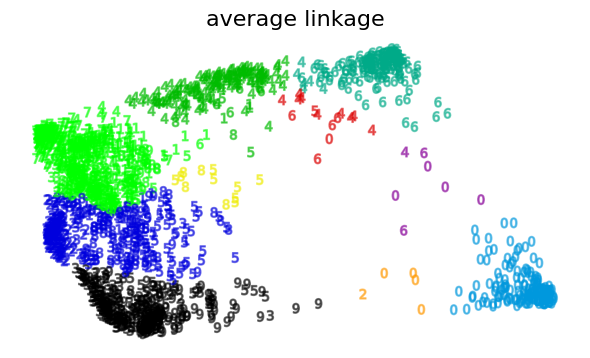

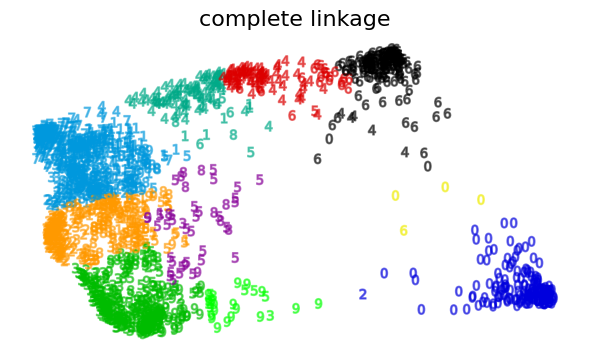

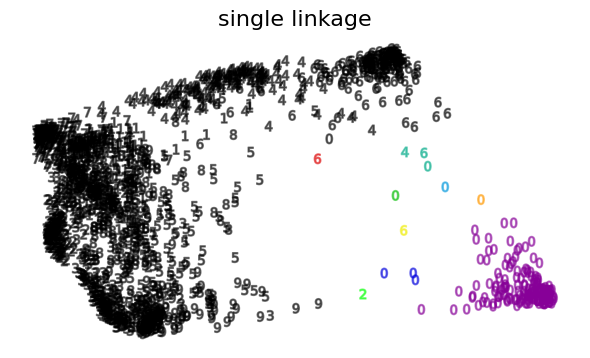

In [21]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, manifold

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)

# ----------------------------------------------------------------------
# funzione per la visualizzazione dei clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=16)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# embedding in 2 dim. del dataset
print("Calcolo dell'embedding..")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("fine.\n")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

print("\n")
plt.show()

## DBSCAN
### Individuare Regioni ad Alta Densità

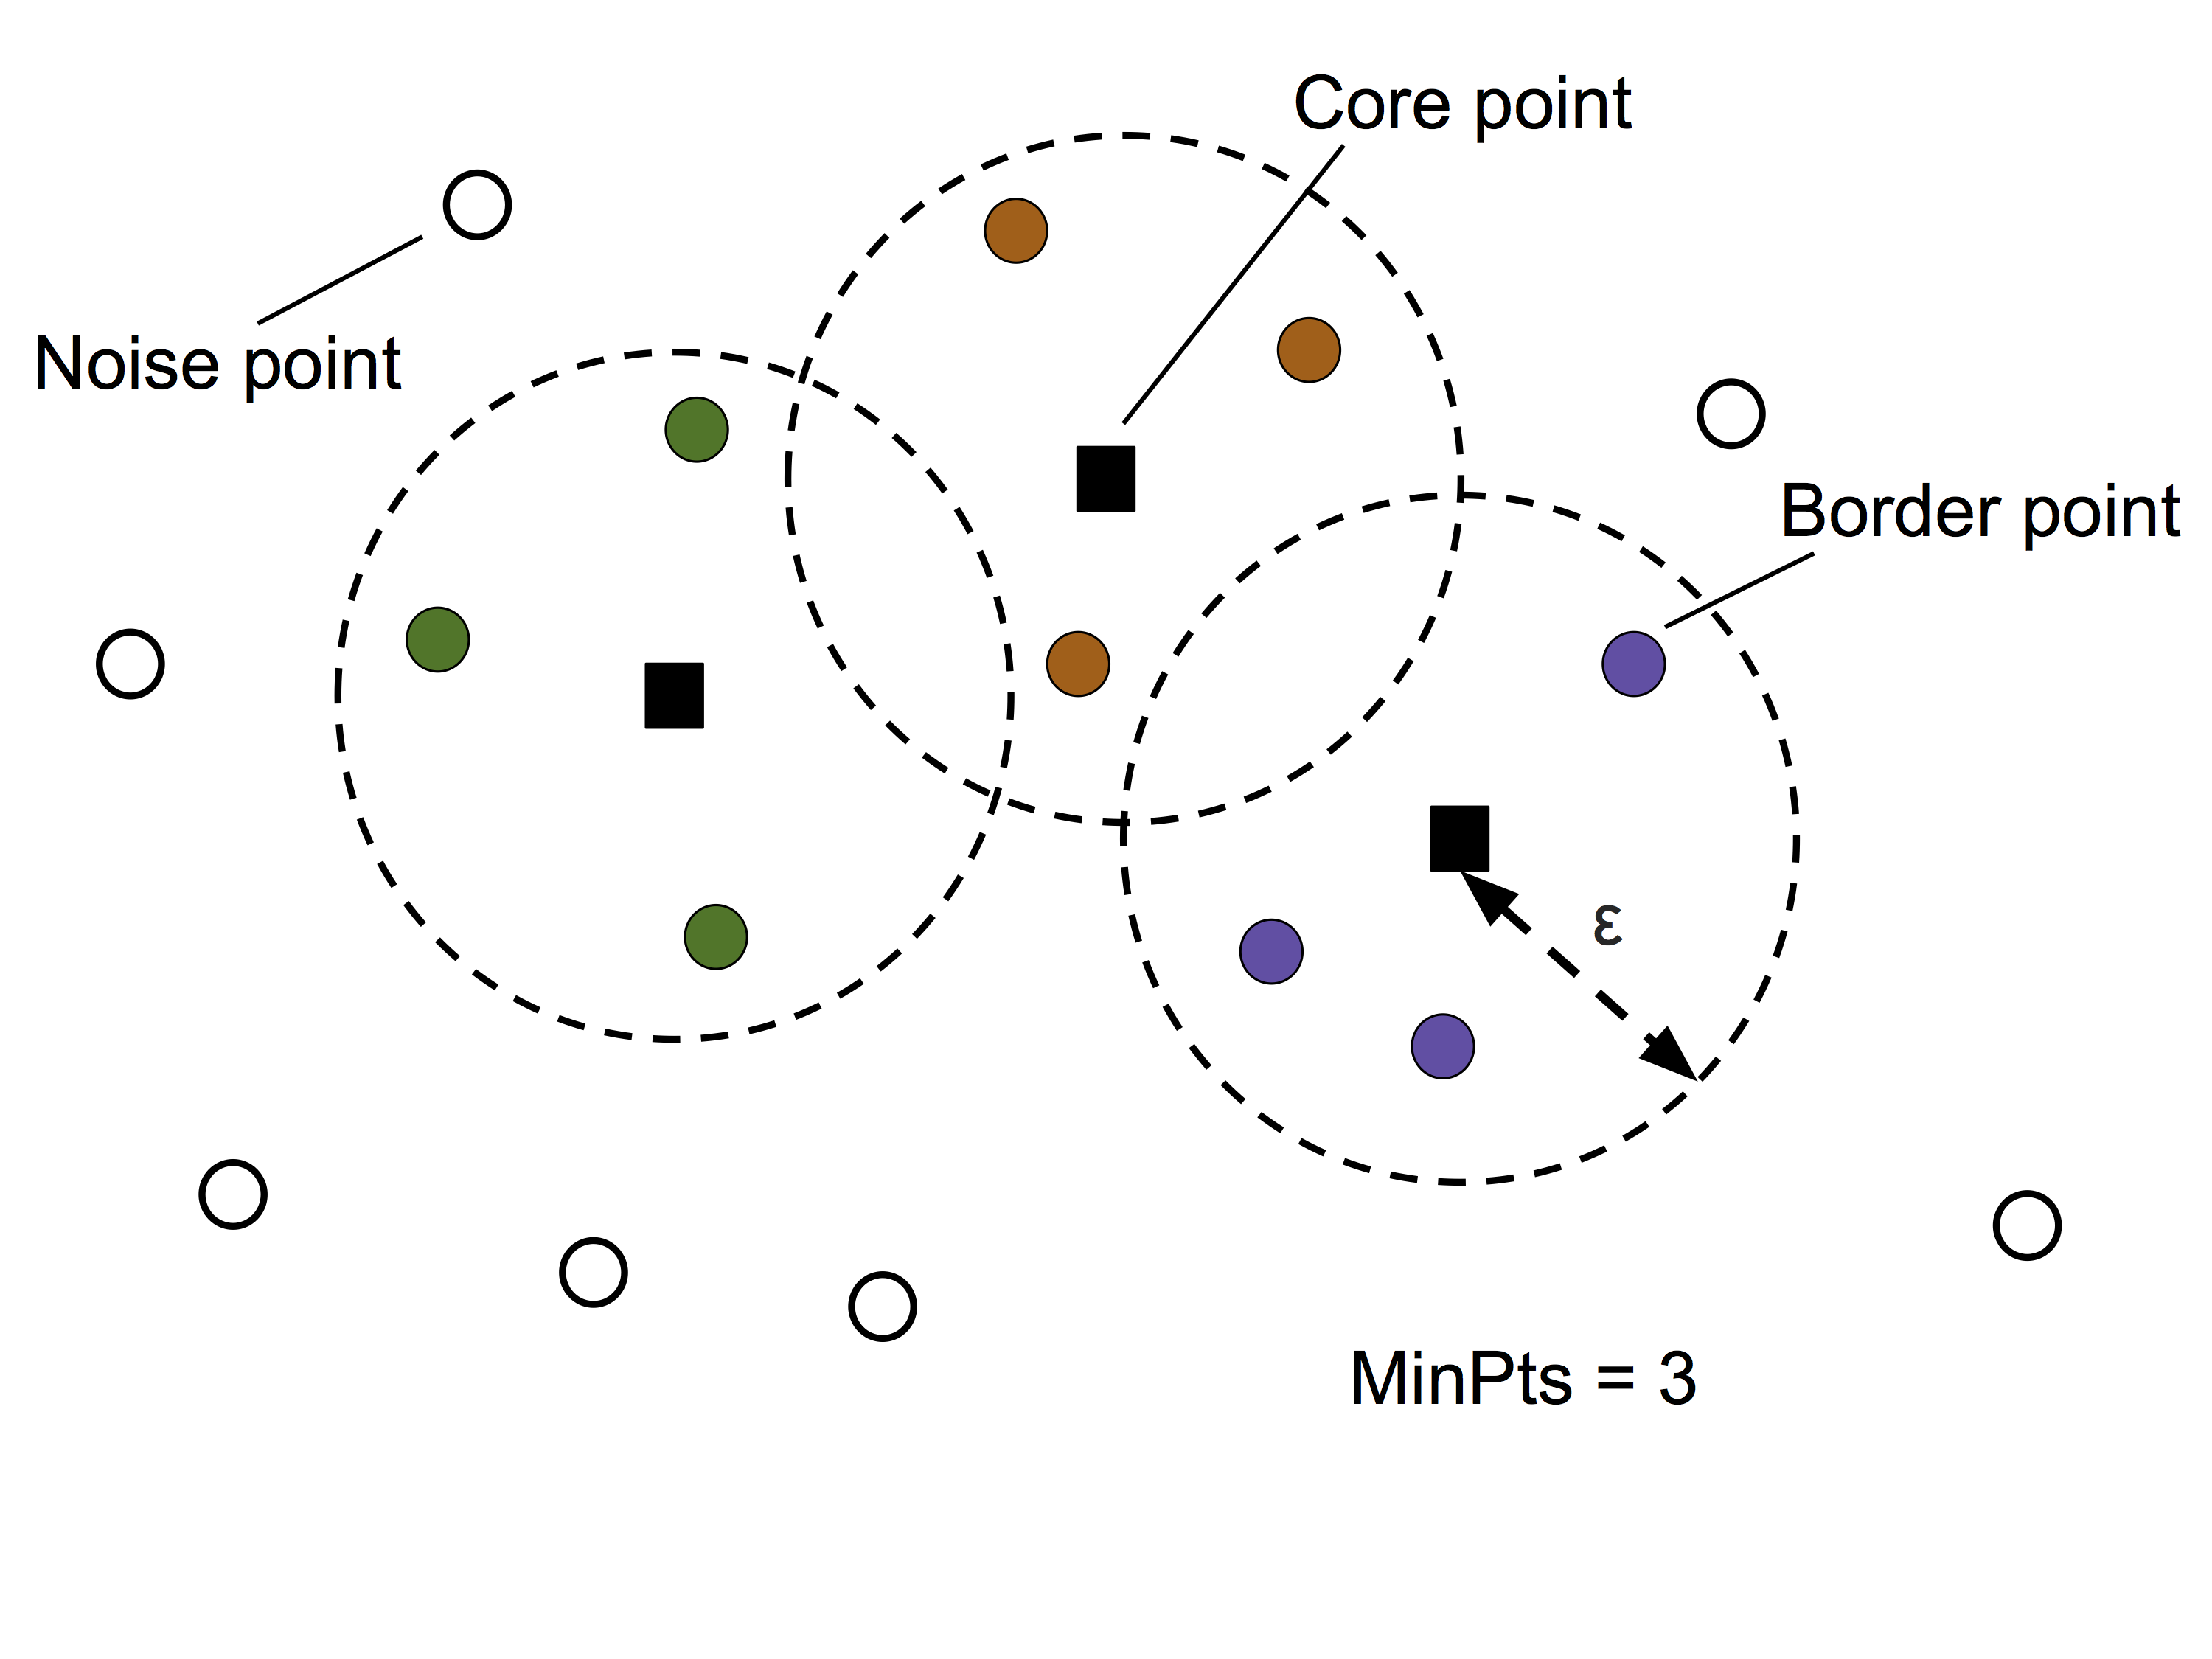

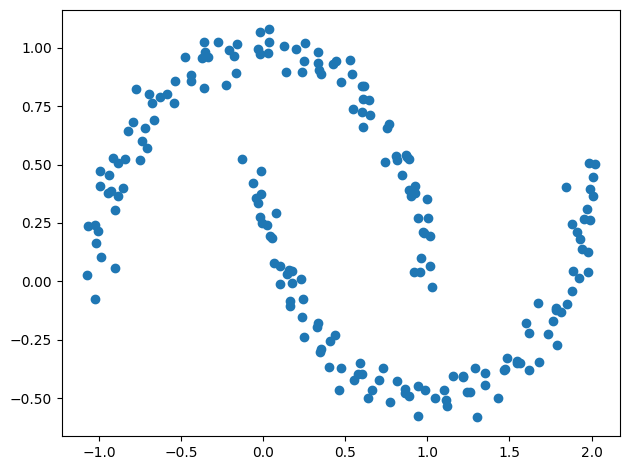

In [22]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

K-means e clustering gerarchico:

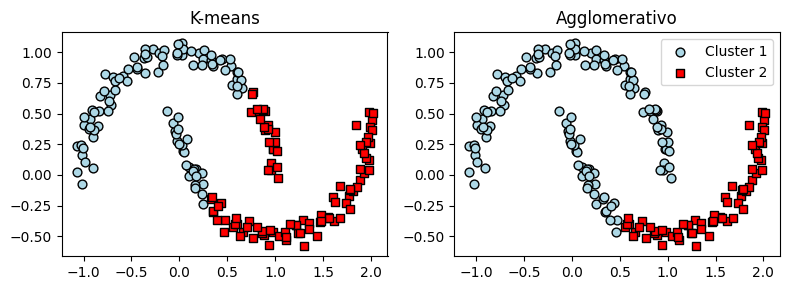

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black', c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], edgecolor='black', c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means')

ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerativo')

plt.legend()
plt.tight_layout()

### Density-based clustering

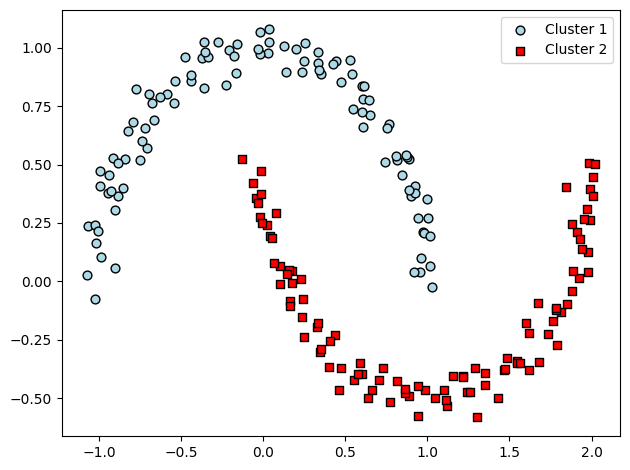

In [24]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40, edgecolor='black', label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40, edgecolor='black', label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

#### Esempio
[Confronto](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) di diversi metodi di clustering in sklearn su diversi dataset

<br>


#### Demo
K-Means sul dataset delle cifre scritte a mano [doc](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

## Misture di Gaussiane


__Gaussian Mixture Model__ (GMM)

Modello probabilistico che assume che i dati siano generati da una mistura di un numero  finito di gaussiane dai parametri sconosciuti
- generalizzazione di <cite>k-means</cite> capace di incorporare informazione sulla struttura della covarianza dei dati e dei centri delle gaussiane latenti

`scikit-learn` implementa diverse classi per GMM che corrispondono a diverse strategie di stima

Il package `sklearn.mixture` contiene diversi GMM
- e l'ausilio alla determinazione del _numero_ appropriato _di componenti_

La classe `GaussianMixture` implementa EM per addestrare il modello
- `GaussianMixture.fit` apprende il GMM dal training set
- `GaussianMixture.predict` assegna ogni istanza di test alla  Gaussiana cui appartiene con maggior  probabilità
`GaussianMixture` ha diverse opzioni per vincolare il tipo di covarianza delle diverse classi: sferica, diagonale, tied o completa 

Si vedrà come visualizzare _ellissoidi di confidenza_ per modelli  multivariati e usare il _BIC_ per determinare il numero di cluster


#### Esempio: Stima di Densità per una Mistura Gaussiana

cfr. [doc](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html)

Disegna la densità stimata di una mistura di due Gaussiane 
(cfr. immagine vista in precedenza)

- dati generati da due Gaussiane con centri e matrici di covarianza differenti

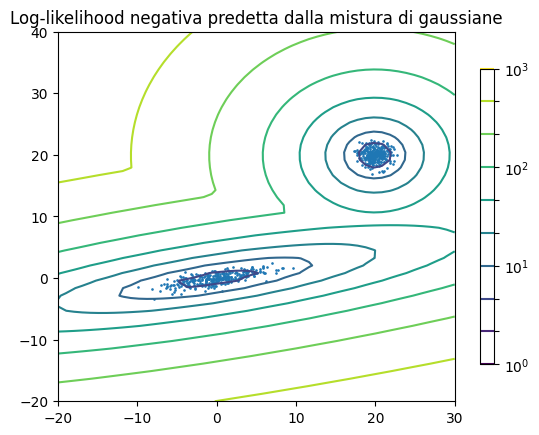

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# genera un campione casuale, con 2 componenti
np.random.seed(0)

# genera dati sferici centrati in (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# genera istanze distribuite in base a gaussiane centrate su zero e allungate
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# unisce i due dataset nel training set finale
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit del GMM con 2 componenti
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# mostra gli scores predetti dal modello come plot di contorni
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Log-likelihood negativa predetta dalla mistura di gaussiane")
plt.axis("tight")
plt.show()

#### Esempio: Demo sui Tipi di Covarianza per GMM

cfr. [doc](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html)

Confronto fra cluster dalla GMM e classi nel dataset (IRIS)

- inizializzazione delle medie delle Gaussiane con quelle delle classi desunte dal training set 
- etichette predette sia per il training set (punti) sia per il  test set (crocette) con diversi tipi di covarianza della GMM 
    - matrici sferiche, diagonali, complete e _tied_ a prestazioni crescenti 
        - covarianza completa prona al sovradattamento su piccoli dataset: non generalizza bene sui dati di test
- solo 2 delle 4 dimensioni: alcuni punti sono separati in altre dim

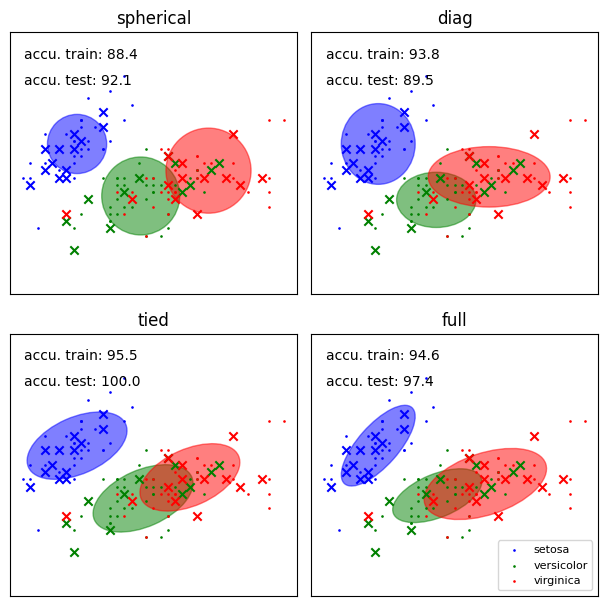

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["blue", "green", "red"]

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# decompone il dataset in training (75%) and testing set (25%)
skf = StratifiedKFold(n_splits=4)
# si considera la prima fold
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# GMM con tipi diversi di matrici di covarianza
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)

for index, (name, estimator) in enumerate(estimators.items()):
    # il training set supervisionato facilita l'inizializzazione dei parametri
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # uso di EM per determinare gli altri parametri
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot dei dati di test (crocette)
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "accu. train: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "accu. test: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=8))
plt.show()

### Selezione del Numero di Componenti del GMM

Si può usare il BIC per scegliere il numero di componenti il GMM in modo efficiente

In teoria, ricostruisce il vero numero di componenti solo asintoticamente, assunto che: 
- dati sufficienti disponibili
- dati effettivamente generati i.i.d. da una mistura di gaussiane

#### Esempio: Model Selection con GMM 

cfr [doc](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py)


Model selection di GMM usando il _BIC_

- riguarda sia il tipo di covarianza e il numero di componenti del modello
- si potrebbe anche usare l'AIC ma il BIC è più indicato se il problema è di identificare il modello giusto

Viene selezionato il modello con 2 componenti e covarianza completa che corrisponde all'effettivo modello che ha generato i dati

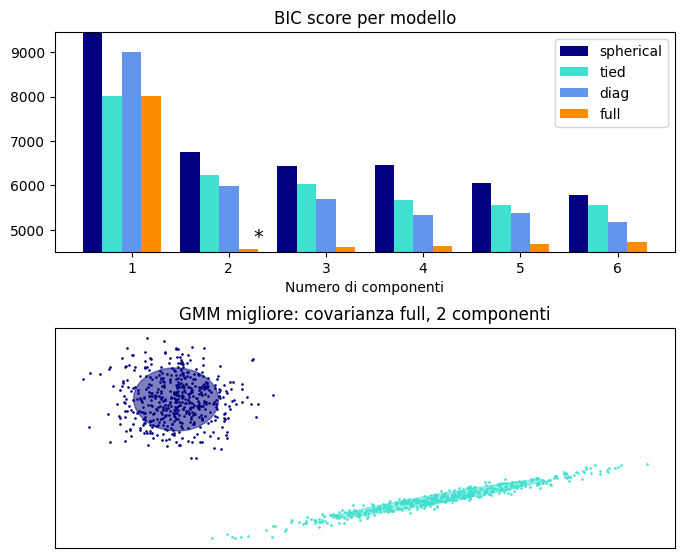

In [27]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

# N. istanze per componente
n_samples = 500

# Genera un campione random, con 2 componenti
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

lowest_bic = np.inf
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # impara un GMM usando EM
        gmm = mixture.GaussianMixture(n_components=n_components, 
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot dei BIC score
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per modello")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Numero di componenti")
spl.legend([b[0] for b in bars], cv_types)

# Plot del modello selezionato
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot di un ellissi che mostra la componente gaussiana
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # conversione in gradi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"GMM migliore: covarianza {best_gmm.covariance_type}, "
    f"{best_gmm.n_components} componenti"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

## Local Outlier Factor

Una nuova osservazione appartiene alla stessa distribuzione delle osservazioni esistenti (_inlier_) o deve essere considerata diversa (_outlier_). <br> È necessario distinguere
- _rilevamento degli_ __outlier__: Il training-set contiene outlier, ossia istanze che si discostano dalle altre. Gli stimatori di rilevamento degli outlier cercano quindi di adattarsi alle regioni in cui i dati di training sono più concentrati, ignorando le osservazioni devianti.
- _rilevamento delle_ __novità__: Il training-set contiene non è inquinato da outlier e si è interessati a rilevare se una nuova osservazione sia un outlier; in questo caso, un outlier si rivela una novità.

Entrambi utilizzati per il _rilevamento delle_ __anomalie__: istanze anomale o insolite

- gli outlier non possono formare un cluster denso: gli stimatori disponibili presuppongono che gli outlier si trovino in regioni a bassa densità
    - il rilevamento degli outlier è non supervisionato
- le novità possono formare un cluster denso purché si trovino in una regione a bassa densità dei dati di training, considerati normali
    - il rilevamento delle novità è semi-supervisionato


Il __Local Outlier Factor__ è un metodo non supervisionato per il rilevamento delle anomalie che calcola la deviazione della _densità locale_ di un dato punto rispetto ai suoi _vicini_: 
- __outlier__: istanze con una densità sostanzialmente inferiore rispetto ai loro vicini

Implementato in [`sklearn.neighbors.LocalOutlierFactor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)

### Outlier detection con il Local Outlier Factor
Questo esempio mostra come utilizzare `LocalOutlierFactor` per il rilevamento degli outlier, caso d'uso predefinito di questo stimatore 
- in tal caso, `LocalOutlierFactor` non offre i metodi `predict`, `decision_function` e `score_samples`

Il numero di vicini considerati (`n_neighbors`) è in genere impostato a un numero
1. maggiore del numero minimo di campioni che un cluster deve contenere, in modo che altri campioni possano essere outlier locali rispetto a questo cluster,<br> e 
2. minore del numero massimo di campioni vicini che possono potenzialmente essere outlier locali. 

Nella pratica, tali informazioni non sono generalmente disponibili

- `n_neighbors=20` spesso funziona abbastanza bene

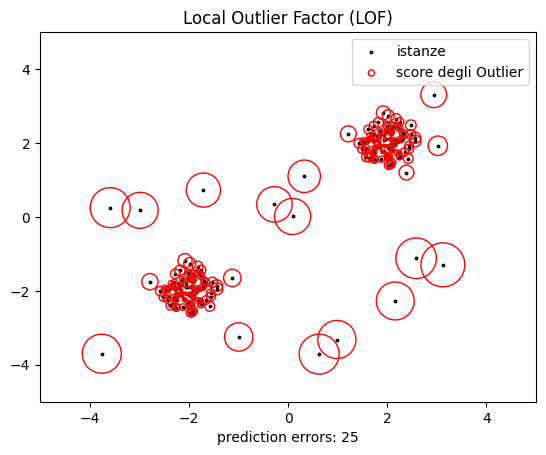

In [28]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Genera dati con outlier
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -100

# addestra il modello per l'outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

#plot
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="istanze")
# plot cerchi con raggio proporzionale agli score degli outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="score degli Outlier",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

### Novelty detection tramite Local Outlier Factor
Nell'esempio (dalla [doc](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_novelty_detection.html) di sklearn) si mostra come utilizzarlo per rilevare _novità_
- `predict`, `decision_function` e `score_samples` non vanno usati sul training set (porterebbero a risultati errati) ma solo su _nuovi dati_ non visti 

Il numero di vicini considerati (parametro n_neighbors) è in genere impostato 1) su un numero maggiore del numero minimo di campioni che un cluster deve contenere, in modo che altri campioni possano essere outlier locali rispetto a questo cluster, e 2) su un numero minore del numero massimo di campioni vicini che possono potenzialmente essere outlier locali. In pratica, tali informazioni non sono generalmente disponibili e l'assunzione di n_neighbors=20 sembra funzionare bene in generale.

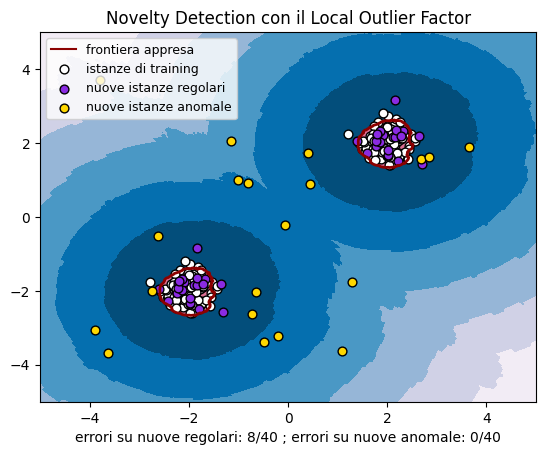

In [29]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Genera istanze normali di training 
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Genera nuove istanze normali di training 
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Genera nuove istanze normali di training
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# adattamento per la novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
# predizioni su X_test, X_outliers o meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot della frontiera, delle istanze, e i vorroti più vicini al piano
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection con il Local Outlier Factor")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [mlines.Line2D([], [], color="darkred"), b1, b2, c],
    [
        "frontiera appresa",
        "istanze di training",
        "nuove istanze regolari",
        "nuove istanze anomale",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=9),
)
plt.xlabel(
    "errori su nuove regolari: %d/40 ; errori su nuove anomale: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()